# Bank Customer Churn prediction ML

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Import Data

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Descriptive Statistic

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df['CreditScore'].nunique()

460

In [44]:
df['Age'].nunique()

70

# Checking Outliers through box plot

<AxesSubplot:xlabel='EstimatedSalary'>

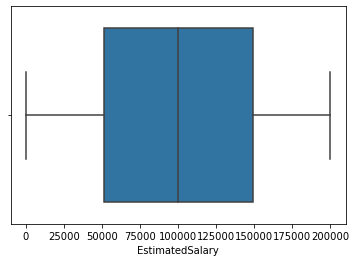

In [9]:
sns.boxplot(x=df['EstimatedSalary'])

<AxesSubplot:xlabel='Balance'>

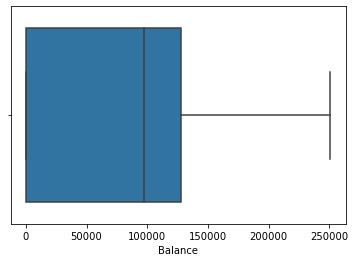

In [10]:
sns.boxplot(x=df['Balance'])

In [46]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [12]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Droping Column

In [13]:
df = df.iloc[:, :2].join(df.iloc[:, 3:])
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Feature Encoding

In [14]:
df1=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df1

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Checking Skewness

In [15]:
df['Balance'].skew()

-0.14110871094154384

In [16]:
df['EstimatedSalary'].skew()

0.0020853576615585162

# Selecting Independent variable(X) and Dependent variable(y)

In [17]:
X=df1.drop('Exited',axis=1)
X

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
y=df1['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Spliting Data into Train and Test 

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
X_train

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8856,8857,15759733,774,26,5,0.00,2,1,1,64716.08,0,0,0
1545,1546,15673908,602,42,6,158414.85,1,1,1,131886.46,1,0,0
8136,8137,15757425,716,38,1,0.00,2,1,1,99661.46,0,0,0
7768,7769,15726695,601,20,9,122446.61,2,1,0,86791.90,0,1,0
7782,7783,15595991,585,54,8,87105.32,1,1,1,55346.14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1100,15673055,494,38,7,0.00,2,1,1,6203.66,0,1,1
2514,2515,15598175,592,26,4,105082.07,2,1,0,132801.57,1,0,0
6637,6638,15668767,850,36,3,0.00,2,1,0,195033.07,0,0,1
2575,2576,15592736,551,54,5,102994.04,1,1,0,176680.16,1,0,1


In [21]:
X_test

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7878,7879,15760456,731,38,10,123711.73,2,1,0,171340.68,0,0,0
3224,3225,15713463,645,41,2,138881.04,1,1,0,129936.53,1,0,0
1919,1920,15739858,618,56,7,0.00,1,1,1,142400.27,0,0,1
4432,4433,15751193,621,33,4,0.00,2,1,1,40299.23,0,1,1
4835,4836,15590623,561,34,4,85141.79,2,1,1,29217.37,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,9074,15611058,702,60,5,138597.54,2,1,1,41536.59,1,0,0
8584,8585,15732967,731,19,6,0.00,2,1,1,151581.79,0,0,1
5390,5391,15573851,735,38,1,0.00,3,0,0,92220.12,0,0,0
5092,5093,15596303,688,39,0,0.00,2,1,0,53222.15,0,0,0


In [22]:
y_train

8856    0
1545    0
8136    0
7768    0
7782    0
       ..
1099    0
2514    0
6637    0
2575    1
7336    0
Name: Exited, Length: 8000, dtype: int64

In [23]:
y_test

7878    1
3224    1
1919    1
4432    0
4835    0
       ..
9073    1
8584    0
5390    1
5092    1
2964    0
Name: Exited, Length: 2000, dtype: int64

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train.iloc[:,[2,3,4,5,9]]=sc.fit_transform(X_train.iloc[:,[2,3,4,5,9]])
X_test.iloc[:,[2,3,4,5,9]]=sc.transform(X_test.iloc[:,[2,3,4,5,9]])

In [25]:
X_train

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8856,8857,15759733,1.277546,-1.232643,-0.012743,-1.239615,2,1,1,-0.620271,0,0,0
1545,1546,15673908,-0.499595,0.284106,0.332830,1.306219,1,1,1,0.546598,1,0,0
8136,8137,15757425,0.678277,-0.095081,-1.395034,-1.239615,2,1,1,-0.013208,0,0,0
7768,7769,15726695,-0.509927,-1.801425,1.369548,0.728185,2,1,0,-0.236775,0,1,0
7782,7783,15595991,-0.675242,1.421668,1.023976,0.160226,1,1,1,-0.783044,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1100,15673055,-1.615474,-0.095081,0.678403,-1.239615,2,1,1,-1.636736,0,1,1
2514,2515,15598175,-0.602917,-1.232643,-0.358316,0.449125,2,1,0,0.562495,1,0,0
6637,6638,15668767,2.062794,-0.284675,-0.703889,-1.239615,2,1,0,1.643567,0,0,1
2575,2576,15592736,-1.026538,1.421668,-0.012743,0.415569,1,1,0,1.324744,1,0,1


In [26]:
X_test

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7878,7879,15760456,0.833261,-0.095081,1.715121,0.748516,2,1,0,1.231988,0,0,0
3224,3225,15713463,-0.055310,0.189309,-1.049462,0.992297,1,1,0,0.512724,1,0,0
1919,1920,15739858,-0.334279,1.611262,0.678403,-1.239615,1,1,1,0.729242,0,0,1
4432,4433,15751193,-0.303283,-0.569065,-0.358316,-1.239615,2,1,1,-1.044435,0,1,1
4835,4836,15590623,-0.923215,-0.474269,-0.358316,0.128671,2,1,1,-1.236947,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,9074,15611058,0.533626,1.990449,-0.012743,0.987741,2,1,1,-1.022940,1,0,0
8584,8585,15732967,0.833261,-1.896221,0.332830,-1.239615,2,1,1,0.888741,0,0,1
5390,5391,15573851,0.874590,-0.095081,-1.395034,-1.239615,3,0,0,-0.142477,0,0,0
5092,5093,15596303,0.388976,-0.000284,-1.740607,-1.239615,2,1,0,-0.819941,0,0,0


# Linear Regression

In [47]:
#Modelling
from sklearn.linear_model import LogisticRegression
logistic_reg= LogisticRegression(random_state=0)
logistic_reg.fit(X_train,y_train)

#Prediction
logistic_reg_pred_train=logistic_reg.predict(X_train)
logistic_reg_pred_test=logistic_reg.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,logistic_reg_pred_train))
print('Test Accuracy score:',accuracy_score(y_test,logistic_reg_pred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(logistic_reg,X,y,cv=5,scoring="accuracy").mean())

Train Accuracy score: 0.79325
Test Accuracy score: 0.8085
Cross Validation Score: 0.7963


# KNN

In [48]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)

#Prediction
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,ypred_train))
print('Test Accuracy score:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model,X,y,cv=5,scoring="accuracy").mean())


Train Accuracy score: 0.80525
Test Accuracy score: 0.7655
Cross Validation Score: 0.7605999999999999


# hyper parameter tunning

In [30]:
from sklearn.model_selection import GridSearchCV

estimator=KNeighborsClassifier()

param_grid={'n_neighbors':list(range(1,41))}

cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")

cv_classifier.fit(X_train,y_train)

cv_classifier.best_params_


{'n_neighbors': 18}

In [49]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=18)
model.fit(X_train,y_train)

#Prediction
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,ypred_train))
print('Test Accuracy score:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model,X,y,cv=5,scoring="accuracy").mean())

Train Accuracy score: 0.79375
Test Accuracy score: 0.8075
Cross Validation Score: 0.7935999999999999


# SVM

In [32]:
#Modelling
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,y_train)

#Prediction
ypred_train=model.predict(X_train)
ypred_test=svm_model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,ypred_train))
print('Test Accuracy score:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model,X,y,cv=5,scoring="accuracy").mean())



Train Accuracy score: 0.79375
Test Accuracy score: 0.8085
Cross Validation Score: 0.7935999999999999


# Hyper Parameter tunning

In [33]:
from sklearn.model_selection import GridSearchCV

estimator=SVC()

param_grid={'kernel':['linear','rbf','sigmoid','poly']}

grid=GridSearchCV(estimator,param_grid,cv=5)

grid.fit(X,y)

grid.best_params_

{'kernel': 'linear'}

# DecisionTree

In [34]:
#Modelling
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(random_state=2)

dt_model.fit(X_train,y_train)

#Prediction
ypred_train=dt_model.predict(X_train)
ypred_test=dt_model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,ypred_train))
print('Test Accuracy score:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(dt_model,X,y,cv=5,scoring="accuracy").mean())

Train Accuracy score: 1.0
Test Accuracy score: 0.786
Cross Validation Score: 0.7434000000000001


# Hyper parameter tunning

In [35]:
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=2)

param_grid={'criterion':['gini','entropy'],'max_depth':list(range(1,20))}

grid=GridSearchCV(estimator,param_grid,cv=5)

grid.fit(X,y)

grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [36]:
#Modelling
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(random_state=2,max_depth=5,criterion="entropy")

dt_model.fit(X_train,y_train)

#Prediction
ypred_train=dt_model.predict(X_train)
ypred_test=dt_model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,ypred_train))
print('Test Accuracy score:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(dt_model,X,y,cv=5,scoring="accuracy").mean())

Train Accuracy score: 0.857375
Test Accuracy score: 0.8575
Cross Validation Score: 0.8503000000000001


# Random Forest

In [37]:
#Modelling
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=2)
model.fit(X_train,y_train)

#Prediction
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,ypred_train))
print('Test Accuracy score:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model,X,y,cv=5,scoring="accuracy").mean())



Train Accuracy score: 1.0
Test Accuracy score: 0.858
Cross Validation Score: 0.8564999999999999


# Hyper Parameter Tunning

In [38]:
from sklearn.model_selection import GridSearchCV

estimator=RandomForestClassifier(random_state=2)

param_grid={'n_estimators':list(range(1,101))}

grid=GridSearchCV(estimator,param_grid,cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 86}

In [39]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=2,n_estimators=86)
model.fit(X_train,y_train)

ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,ypred_train))
print('Test Accuracy score:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model,X,y,cv=5,scoring="accuracy").mean())

Train Accuracy score: 0.99975
Test Accuracy score: 0.86
Cross Validation Score: 0.8550000000000001


In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Boosting

In [41]:
#Modelling
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

#Prediction
ypred_train=xgb_model.predict(X_train)
ypred_test=xgb_model.predict(X_test)

#Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy score:',accuracy_score(y_train,ypred_train))
print('Test Accuracy score:',accuracy_score(y_test,ypred_test))

from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(estimator=xgb_model,X=X,y=y,cv=5).mean())

Train Accuracy score: 0.964875
Test Accuracy score: 0.8515
Cross Validation Score: 0.7916


# Model selection

In [42]:
final_model=DecisionTreeClassifier(random_state=2,max_depth=5,criterion="entropy")

In [43]:
#Decision Tree is my final model because it has no overfitting or underfitting problem(Train accuracy=Test accuracy)
#And Test accuracy=cross validation score and also it has highest cross validation score